In [1]:
import pandas as pd
import numpy as np
from keras import models, layers, regularizers
from matplotlib import pyplot as plt
import seaborn as sn

Using TensorFlow backend.


In [2]:
data = pd.read_csv("ionosphere_data.csv")
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [3]:
data.shape

(351, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
feature1     351 non-null int64
feature2     351 non-null int64
feature3     351 non-null float64
feature4     351 non-null float64
feature5     351 non-null float64
feature6     351 non-null float64
feature7     351 non-null float64
feature8     351 non-null float64
feature9     351 non-null float64
feature10    351 non-null float64
feature11    351 non-null float64
feature12    351 non-null float64
feature13    351 non-null float64
feature14    351 non-null float64
feature15    351 non-null float64
feature16    351 non-null float64
feature17    351 non-null float64
feature18    351 non-null float64
feature19    351 non-null float64
feature20    351 non-null float64
feature21    351 non-null float64
feature22    351 non-null float64
feature23    351 non-null float64
feature24    351 non-null float64
feature25    351 non-null float64
feature26    351 non-null float64
feature27    35

In [5]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [7]:
data.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [8]:
# Feature 2 is totally with zero value so we can drop it
data.drop("feature2", axis=1, inplace=True)
data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [9]:
data.label.replace("g",1,inplace=True)
data.label.replace("b",0,inplace=True)
data.label

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: label, Length: 351, dtype: int64

In [17]:
#np.random.seed(111)
#part = np.random.randn(len(data)) < 0.6
#X_train = data[part]
#X_test = data[~part]
#Y_train = X_train.pop("label")
#Y_test = X_test.pop("label")
data = data.sample(frac = 1)
data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
149,1,0.90374,-0.01604,1.00000,0.08021,1.00000,0.01604,0.93048,0.00535,0.93583,...,0.05348,0.96974,0.04452,0.87701,0.01070,1.00000,0.09091,0.97861,0.06417,1
291,1,0.59887,0.14689,0.69868,-0.13936,0.85122,-0.13936,0.80979,0.02448,0.50471,...,-0.33145,0.61444,-0.16837,0.52731,-0.02072,0.53861,-0.31262,0.67420,-0.22034,1
300,1,0.92870,0.33164,0.76168,0.62349,0.49305,0.84266,0.21592,0.95193,-0.13956,...,-0.74735,-0.22323,-0.86122,0.07810,-0.87159,0.36021,-0.78057,0.59407,-0.60270,1
48,1,0.98166,0.00874,0.98103,-0.03818,0.97565,-0.05699,0.95947,-0.06971,0.99004,...,-0.19689,0.81813,-0.21136,0.78546,-0.23864,0.76911,-0.23095,0.74323,-0.23902,1
44,1,0.99025,-0.05785,0.99793,-0.13009,0.98663,-0.19430,0.99374,-0.25843,0.92738,...,-0.68479,0.65247,-0.73174,0.61010,-0.75353,0.54752,-0.80278,0.49195,-0.83245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,0.08696,0.00686,0.13959,-0.04119,0.10526,-0.08238,0.12586,-0.06178,0.23341,...,-0.10297,0.08467,0.01373,0.11213,-0.06636,0.09611,-0.07323,0.11670,-0.06865,0
7,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
232,0,1.00000,1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,0
251,1,0.87048,0.38027,0.64099,0.69212,0.31347,0.86625,-0.03933,0.90740,-0.42173,...,-0.66421,0.38544,-0.51568,0.52573,-0.29897,0.56239,-0.05938,0.51460,0.16645,1


In [19]:
#def vectoriza_sequences(sequences, dimensions = 1089):
#    results =  np.zeros((len(sequences),dimensions))
#    for i, sequence in enumerate(sequences):
#        results[i,sequence] = 1
#    return results
#X_train = vectoriza_sequences(X_train.shape)
#X_test = vectoriza_sequences(X_test.shape)
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = data.iloc[:211,:]

# Testing Data
test_data = data.iloc[211:,:]

In [20]:
# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')

# Test Labels
test_labels = test_data.pop('label')

In [21]:
train_labels = np.asarray(train_labels).astype("float32")
test_labels = np.asarray(test_labels).astype("float32")

In [23]:
# Standardizing Training And Testing Data
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
test_data = StandardScaler().fit_transform(test_data)
n_features = train_data.shape[1]

In [29]:
model = models.Sequential()
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))
# Making Base Model
#model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (n_features,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
#compiling the model
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                

In [31]:
#x_val = X_train[:210]
#partial_x_train = X_train[210:]
#y_val = Y_train[:210]
#partial_y_train = Y_train[210:]
# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 8)

Epoch 1/100
211/211 [==============================] - 1s 6ms/step - loss: 0.7658 - accuracy: 0.4076
Epoch 2/100
211/211 [==============================] - 0s 312us/step - loss: 0.6805 - accuracy: 0.6303
Epoch 3/100
211/211 [==============================] - 0s 274us/step - loss: 0.6648 - accuracy: 0.6730
Epoch 4/100
211/211 [==============================] - 0s 312us/step - loss: 0.6491 - accuracy: 0.7014
Epoch 5/100
211/211 [==============================] - 0s 265us/step - loss: 0.6289 - accuracy: 0.7630
Epoch 6/100
211/211 [==============================] - 0s 274us/step - loss: 0.6155 - accuracy: 0.7962
Epoch 7/100
211/211 [==============================] - 0s 251us/step - loss: 0.6035 - accuracy: 0.8483
Epoch 8/100
211/211 [==============================] - 0s 293us/step - loss: 0.5831 - accuracy: 0.8341
Epoch 9/100
211/211 [==============================] - 0s 251us/step - loss: 0.5697 - accuracy: 0.8483
Epoch 10/100
211/211 [==============================] - 0s 331us/step - los

211/211 [==============================] - 0s 298us/step - loss: 0.1672 - accuracy: 0.9763
Epoch 80/100
211/211 [==============================] - 0s 288us/step - loss: 0.1647 - accuracy: 0.9810
Epoch 81/100
211/211 [==============================] - 0s 288us/step - loss: 0.1574 - accuracy: 0.9810
Epoch 82/100
211/211 [==============================] - 0s 246us/step - loss: 0.1540 - accuracy: 0.9810
Epoch 83/100
211/211 [==============================] - 0s 241us/step - loss: 0.1579 - accuracy: 0.9810
Epoch 84/100
211/211 [==============================] - 0s 246us/step - loss: 0.1447 - accuracy: 0.9858
Epoch 85/100
211/211 [==============================] - 0s 241us/step - loss: 0.1486 - accuracy: 0.9810
Epoch 86/100
211/211 [==============================] - 0s 236us/step - loss: 0.1479 - accuracy: 0.9810
Epoch 87/100
211/211 [==============================] - 0s 298us/step - loss: 0.1438 - accuracy: 0.9858
Epoch 88/100
211/211 [==============================] - 0s 303us/step - loss:

In [32]:
#history = model.fit(partial_x_train,
#partial_y_train,
#epochs=100,
#batch_size=512,
#validation_data=(x_val, y_val))
# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
95,0.139914,0.981043,95
96,0.129620,0.985782,96
97,0.126969,0.985782,97
98,0.136360,0.981043,98
99,0.146555,0.976303,99


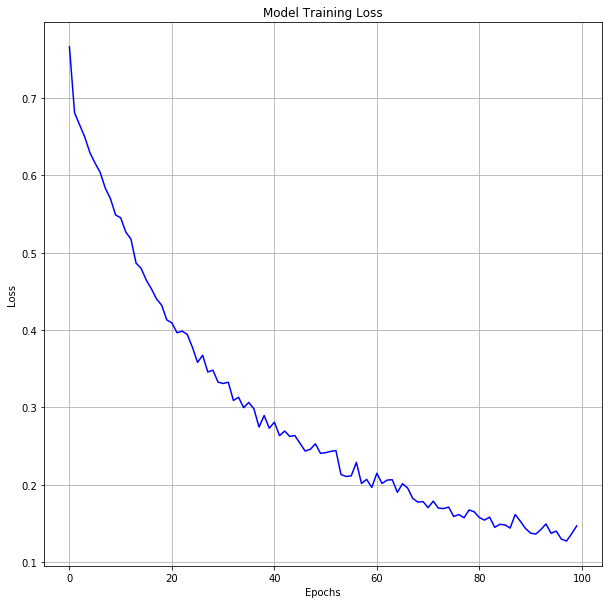

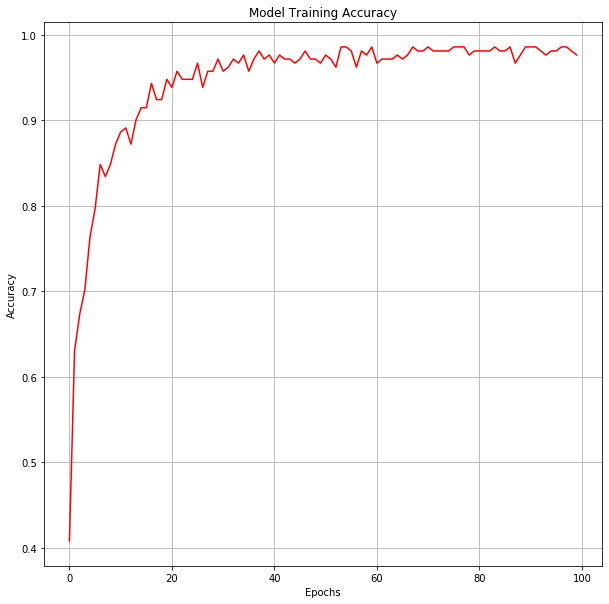

In [33]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [34]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions[:10]

array([[3.01794579e-37],
       [4.43969800e-28],
       [8.27673886e-30],
       [2.57259407e-32],
       [1.13592165e-07],
       [8.67878675e-01],
       [8.67878675e-01],
       [8.67878675e-01],
       [8.67878675e-01],
       [3.08740977e-02]], dtype=float32)

In [35]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

140/140 [==============================] - 0s 955us/step


[0.23715939862387522, 0.9214285612106323]

In [36]:
# Making Classification Report
from sklearn.metrics import classification_report
model_classification_report = classification_report(test_labels, predictions.round(), output_dict=True)

In [37]:
classification_report_df = pd.DataFrame(model_classification_report)
classification_report_df

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.960000,0.900000,0.921429,0.930000,0.924429
recall,0.842105,0.975904,0.921429,0.909004,0.921429
f1-score,0.897196,0.936416,0.921429,0.916806,0.920448
support,57.000000,83.000000,0.921429,140.000000,140.000000


In [38]:
# Testing Loss And Testing Accuracy
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.23715939862387522
Testing Accuracy: 0.9214285612106323
